BBM 409 Programming Assignment-1


2210356066 Zeynep Nisa Karataş
2210356113 Gül Sena Ergun 

PART I: Textual Data Analysis

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import cv2
import sklearn
import matplotlib
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, KFold, cross_val_predict
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix,precision_score, recall_score,f1_score
from sklearn.model_selection import KFold, cross_val_predict

In [15]:
versions = {
    'pandas': pd.__version__,
    'numpy': np.__version__,
    'matplotlib': matplotlib.__version__,
    'seaborn': sns.__version__,
    'opencv': cv2.__version__,
    'sklearn': sklearn.__version__
}
print(versions)


{'pandas': '2.2.2', 'numpy': '1.26.4', 'matplotlib': '3.9.2', 'seaborn': '0.13.2', 'opencv': '4.11.0', 'sklearn': '1.5.1'}


In [162]:
df = pd.read_csv("/Users/nisa/Downloads/BBM409_S25_PA1_Dataset_v1/part_i.csv")

In [163]:
df.head()

,AREA,PERIMETER,MAJOR_AXIS,MINOR_AXIS,ECCENTRICITY,EQDIASQ,SOLIDITY,CONVEX_AREA,EXTENT,ASPECT_RATIO,...,ALLdaub4L,ALLdaub4a,ALLdaub4b,ALLdaub4Y,ALLdaub4Cb,ALLdaub4Cr,ALLdaub4XX,ALLdaub4YY,ALLdaub4ZZ,CLASS
0,7805,437.915,209.8215,48.0221,0.9735,99.6877,0.9775,7985,0.3547,4.3693,...,113.9924,65.0610,59.5989,104.8552,67.8779,63.0828,0.3673,0.3793,0.4733,Basmati
1,7503,340.757,138.3361,69.8417,0.8632,97.7400,0.9660,7767,0.6637,1.9807,...,105.7055,64.3685,62.2084,96.8375,65.5371,63.5832,0.3014,0.3144,0.3641,Arborio
2,5124,314.617,141.9803,46.5784,0.9447,80.7718,0.9721,5271,0.4760,3.0482,...,109.7155,62.6423,58.7439,100.2352,68.9753,59.8342,0.3233,0.3445,0.4448,Jasmine
3,7990,437.085,201.4386,51.2245,0.9671,100.8622,0.9659,8272,0.6274,3.9325,...,116.5405,64.9069,60.2562,107.2560,67.3298,63.2237,0.3880,0.4020,0.4904,Basmati
4,7433,342.893,140.3350,68.3927,0.8732,97.2830,0.9831,7561,0.6006,2.0519,...,107.7502,64.7071,61.3549,98.8704,66.2048,63.5378,0.3184,0.3303,0.3928,Arborio


In [164]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75000 entries, 0 to 74999
Columns: 107 entries, AREA to CLASS
dtypes: float64(95), int64(11), object(1)
memory usage: 61.2+ MB


In [165]:
df.isnull().sum()

AREA            0
PERIMETER       0
MAJOR_AXIS      0
MINOR_AXIS      0
ECCENTRICITY    0
               ..
ALLdaub4Cr      0
ALLdaub4XX      0
ALLdaub4YY      0
ALLdaub4ZZ      0
CLASS           0
Length: 107, dtype: int64

So there is no missing data in our csv file.This makes preprocessing easier for us.

In [171]:
df = df.drop_duplicates()

In [173]:
le = LabelEncoder()
df["CLASS"] = le.fit_transform(df["CLASS"])

# this line prints the unique numeric labels for 'CLASS' to verify that transformation is successful.
print(df["CLASS"].unique())


[1 0 3 2 4]


Categorical variables need to be converted to numeric values because they often require numerical input. In this case we transformed 'CLASS' to its numeric labels

In [176]:
# Feature Selection
corr_matrix = df.corr().abs()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
to_drop = [column for column in upper.columns if any(upper[column] > 0.9)]
df.drop(columns=to_drop, inplace=True)

Feature selection is a crucial step to improve model performance and reduce redundancy. In this project, we analyzed the correlation between features and removed those that were highly correlated (correlation coefficient > 0.9).

In [178]:
from sklearn.model_selection import train_test_split

X = df.drop(columns=["CLASS"])  # independent variable 
y = df["CLASS"]  # dependent variable

# Splitting  data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Train data feature: {X_train.shape}")
print(f"Test data feature: {X_test.shape}")


Train data feature: (59762, 34)
Test data feature: (14941, 34)


Now we splitted the data as %80 train data and %20 test data.Preprocessing steps are done for Random Forest.

In [182]:
# 5. Makine Öğrenimi Modellerini Eğitme ve Test Etme
def train_and_evaluate(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"Model: {model.__class__.__name__}")
    print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
    print(f"Precision: {precision_score(y_test, y_pred, average='weighted'):.4f}")
    print(f"Recall: {recall_score(y_test, y_pred, average='weighted'):.4f}")
    print(f"F1: {f1_score(y_test, y_pred, average='weighted'):.4f}")
    
    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title(f"Confusion Matrix - {model.__class__.__name__}")
    plt.show()

train_and_evaluate function will basically train all the model type and print out their confusion matrices with each model's precision, recall,accuracy, f1 scores.

In [192]:
# K-Fold Cross Validation
def k_fold_validation(model, X, y, cv=5):
    scores = cross_val_score(model, X, y, cv=cv, scoring='accuracy')
    print(f"{model.__class__.__name__} - Mean Accuracy (K-Fold {cv}): {np.mean(scores):.4f} ± {np.std(scores):.4f}")


The k_fold_validation function performs K-Fold Cross Validation to evaluate a machine learning model’s performance. It splits the dataset into cv (default: 5) folds, trains the model on cv-1 folds, and tests it on the remaining fold, repeating this process for all folds. It calculates the accuracy for each iteration and prints the mean accuracy and standard deviation, giving insight into the model’s performance and stability. This method helps prevent overfitting and provides a more reliable evaluation compared to a simple train-test split.

Random Forest (n_estimators=50):
Model: RandomForestClassifier
Accuracy: 0.9986
Precision: 0.9986
Recall: 0.9986
F1: 0.9986


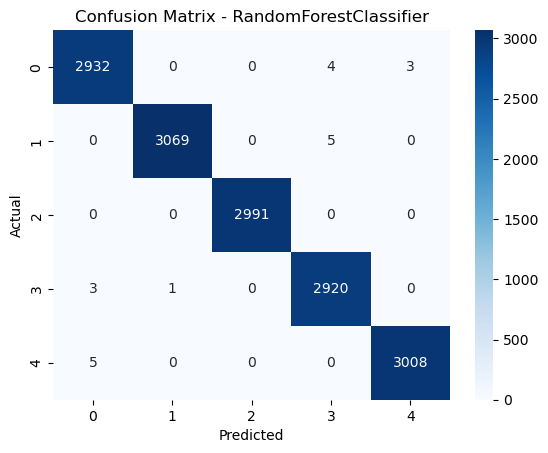

RandomForestClassifier - Mean Accuracy (K-Fold 5): 0.9986 ± 0.0003
Random Forest (n_estimators=100):
Model: RandomForestClassifier
Accuracy: 0.9985
Precision: 0.9985
Recall: 0.9985
F1: 0.9985


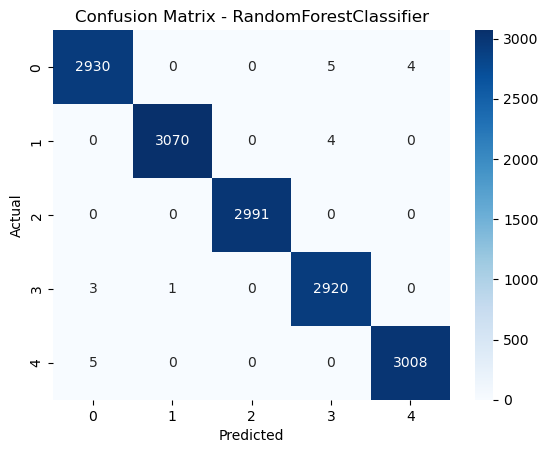

RandomForestClassifier - Mean Accuracy (K-Fold 5): 0.9986 ± 0.0003
Random Forest (n_estimators=200):
Model: RandomForestClassifier
Accuracy: 0.9985
Precision: 0.9985
Recall: 0.9985
F1: 0.9985


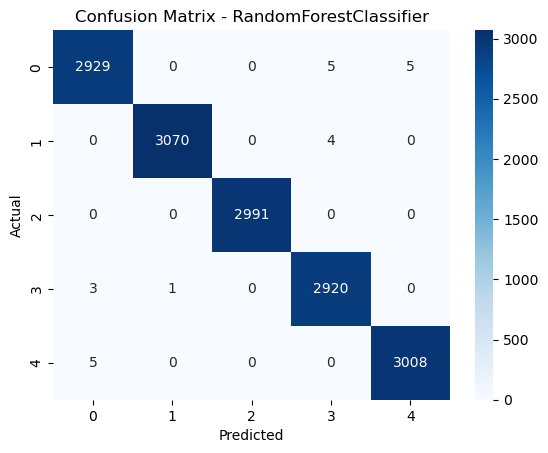

RandomForestClassifier - Mean Accuracy (K-Fold 5): 0.9986 ± 0.0003


In [195]:
# Different number of trees for Random Forest
for n in [50, 100, 200]:
    clf = RandomForestClassifier(n_estimators=n, random_state=42)
    print(f"Random Forest (n_estimators={n}):")
    train_and_evaluate(clf, X_train, X_test, y_train, y_test)
    k_fold_validation(clf, X, y)


The Random Forest models with 50, 100, and 200 estimators show almost identical performance, with accuracy, precision, recall, and F1 scores all around 0.9985-0.9986. The K-Fold mean accuracy is also consistent at 0.9986 ± 0.0003 across all models. While the model with 50 estimators has a slightly higher score, the difference is negligible. Therefore, the model with 50 estimators is the most efficient choice, offering nearly the same performance while requiring fewer computational resources.

In [201]:
scaler = StandardScaler() #Feature scaling
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Feature scaling is a crucial preprocessing step, especially for distance-based models like k-Nearest Neighbors (kNN) and Support Vector Machine (SVM). These algorithms are sensitive to the scale of input features, as they rely on distance calculations.We applied Z-score normalization (Standardization) using StandardScaler() from sklearn.preprocessing.After applying standardization, SVM and kNN performed better due to uniform feature distributions. This step was essential for optimizing classification accuracy.

In [204]:
X_train = np.nan_to_num(X_train)
X_test = np.nan_to_num(X_test)
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy="mean")  
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)


In this code, missing values (NaNs) in both the training (X_train) and test (X_test) datasets are handled in two steps. First, the np.nan_to_num() function from NumPy is used to replace NaN values with 0 in both datasets. After this, the SimpleImputer class from sklearn.impute is used to handle missing values by replacing them with the mean of each column. The imputer is initialized with the strategy set to "mean". The imputer is then fitted on the training data (X_train) and transforms it by replacing NaNs with the calculated mean. Finally, the same imputer is applied to the test data (X_test) to ensure consistent handling of missing values across both datasets.

Now preprocessing steps are done for Naïve Bayes, kNN and SVM models.


🔹 Naive Bayes:
Model: GaussianNB
Accuracy: 0.9927
Precision: 0.9928
Recall: 0.9927
F1: 0.9927


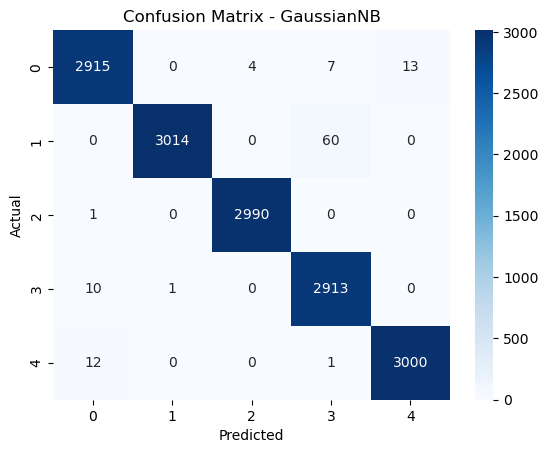

In [210]:
# Training Naïve Bayes Model
nb_clf = GaussianNB()
print("\n🔹 Naive Bayes:")
train_and_evaluate(nb_clf, X_train, X_test, y_train, y_test)


The Naive Bayes model (GaussianNB) performs well with an accuracy of 0.9927, and the precision, recall, and F1 scores are all very close at 0.9927-0.9928. While the performance is slightly lower compared to the Random Forest models, it is still quite strong and reliable. Naive Bayes is often faster to train and requires fewer computational resources, making it a good choice for scenarios where efficiency is important. However, for this particular case, Random Forest with 50 estimators outperforms it slightly in terms of accuracy and other metrics.

SVM (kernel=linear):
Model: SVC
Accuracy: 0.9982
Precision: 0.9982
Recall: 0.9982
F1: 0.9982


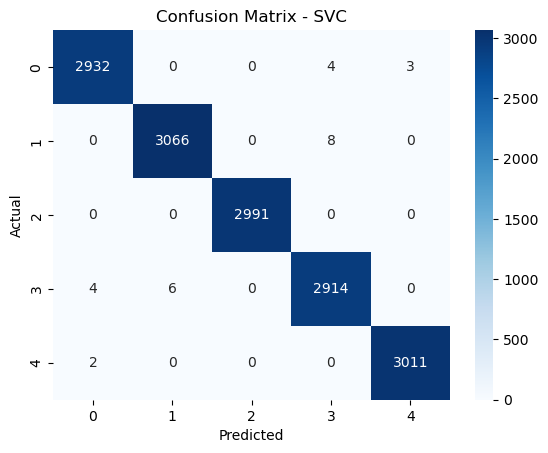

SVM (kernel=rbf):
Model: SVC
Accuracy: 0.9989
Precision: 0.9989
Recall: 0.9989
F1: 0.9989


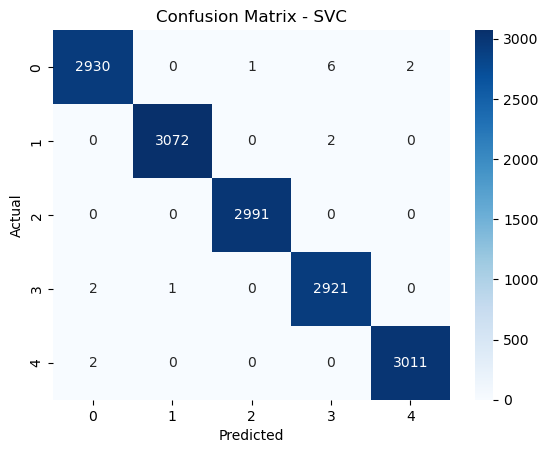

SVM (kernel=poly):
Model: SVC
Accuracy: 0.9987
Precision: 0.9987
Recall: 0.9987
F1: 0.9987


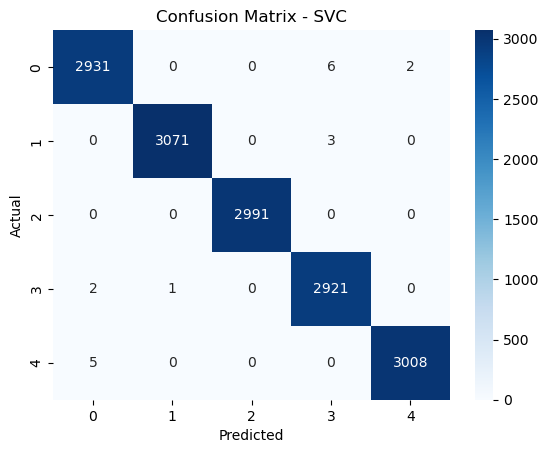

In [212]:
# Training SVM Model with different types of kernel.
for kernel in ["linear", "rbf", "poly"]:
    svm = SVC(kernel=kernel,random_state =42)
    print(f"SVM (kernel={kernel}):")
    train_and_evaluate(svm, X_train, X_test, y_train, y_test)

The SVM models show strong performance with different kernels. The linear kernel achieves an accuracy, precision, recall, and F1 score of 0.9982, while the rbf kernel performs slightly better with all metrics at 0.9989. The polynomial kernel is also very competitive, with scores of 0.9987 across the board. Among these, the rbf kernel stands out as the best, delivering the highest scores. However, all models perform similarly, and the differences are minor. If absolute performance is critical, the rbf kernel would be the optimal choice, though the other kernels still offer excellent results.


🔹 Normal kNN (k=3):
Model: KNeighborsClassifier
Accuracy: 0.9975
Precision: 0.9975
Recall: 0.9975
F1: 0.9975


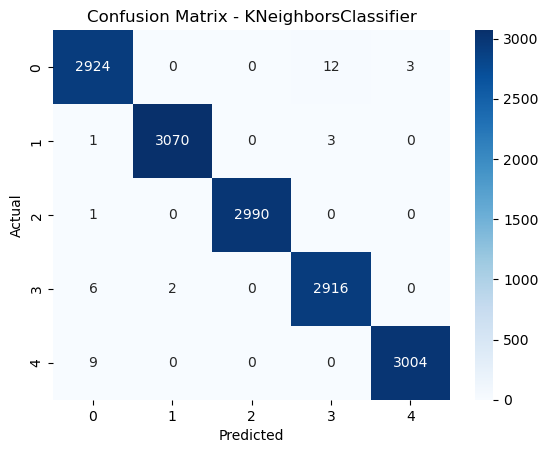


🔹 Weighted kNN (k=3):
Model: KNeighborsClassifier
Accuracy: 0.9975
Precision: 0.9975
Recall: 0.9975
F1: 0.9975


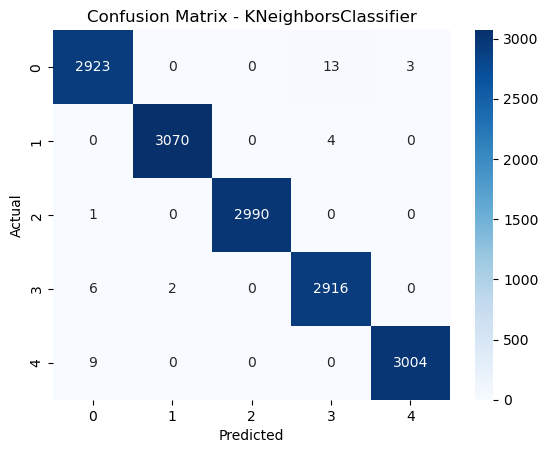


🔹 Normal kNN (k=5):
Model: KNeighborsClassifier
Accuracy: 0.9978
Precision: 0.9978
Recall: 0.9978
F1: 0.9978


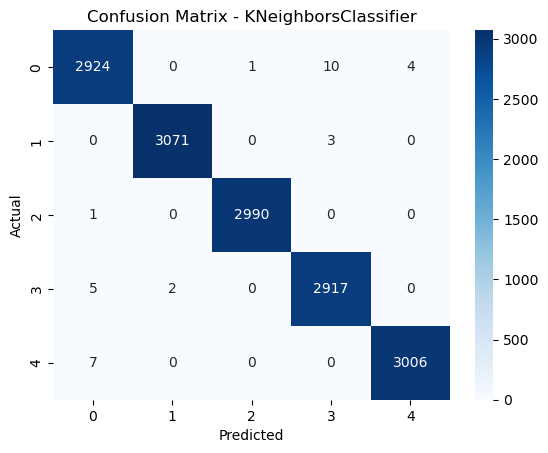


🔹 Weighted kNN (k=5):
Model: KNeighborsClassifier
Accuracy: 0.9978
Precision: 0.9978
Recall: 0.9978
F1: 0.9978


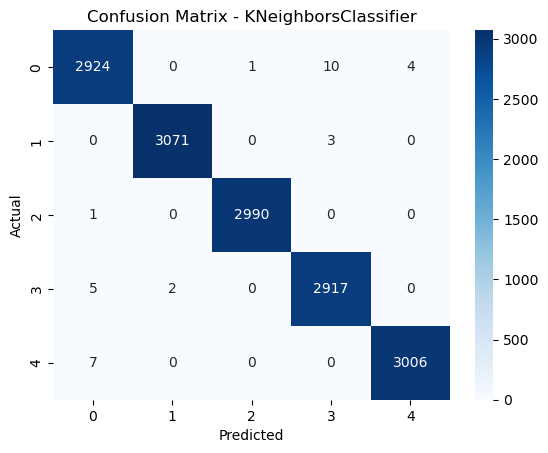


🔹 Normal kNN (k=7):
Model: KNeighborsClassifier
Accuracy: 0.9976
Precision: 0.9976
Recall: 0.9976
F1: 0.9976


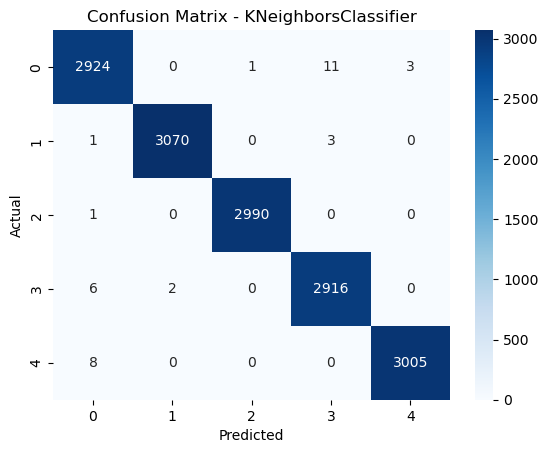


🔹 Weighted kNN (k=7):
Model: KNeighborsClassifier
Accuracy: 0.9977
Precision: 0.9977
Recall: 0.9977
F1: 0.9977


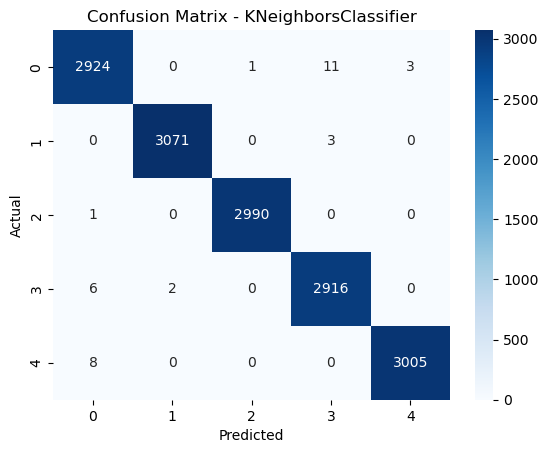


🔹 Normal kNN (k=9):
Model: KNeighborsClassifier
Accuracy: 0.9974
Precision: 0.9974
Recall: 0.9974
F1: 0.9974


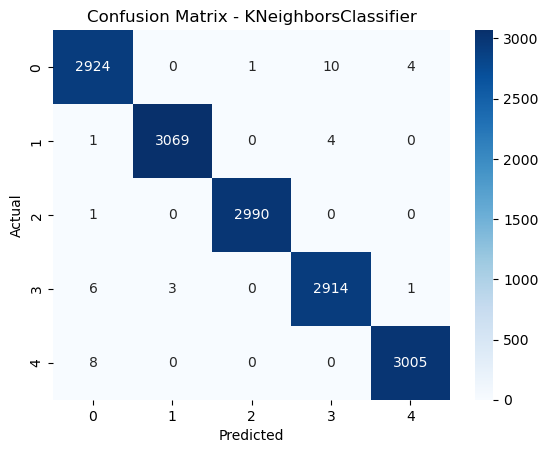


🔹 Weighted kNN (k=9):
Model: KNeighborsClassifier
Accuracy: 0.9974
Precision: 0.9974
Recall: 0.9974
F1: 0.9974


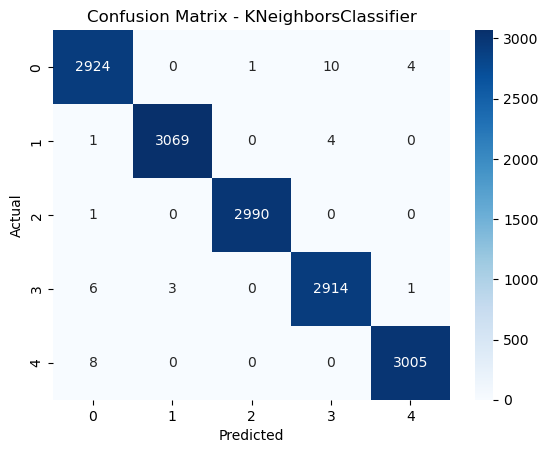

In [216]:
# Different k values for kNN and weighted kNN.
for k in [3, 5, 7, 9]:
    knn_uniform = KNeighborsClassifier(n_neighbors=k, weights='uniform')  # Normal kNN
    knn_weighted = KNeighborsClassifier(n_neighbors=k, weights='distance')  # Weighted kNN
    
    print(f"\n🔹 Normal kNN (k={k}):")
    train_and_evaluate(knn_uniform, X_train, X_test, y_train, y_test)

    print(f"\n🔹 Weighted kNN (k={k}):")
    train_and_evaluate(knn_weighted, X_train, X_test, y_train, y_test)


The k-Nearest Neighbors (kNN) models show consistent performance across various configurations. For both normal and weighted kNN,  the results are nearly identical for each value of k, with accuracy, precision, recall, and F1 scores around 0.9974-0.9978. The best performance is achieved with k=5 for both normal and weighted kNN, yielding an accuracy and other metrics of 0.9978. As k increases beyond 5, the performance slightly drops, with k=9 showing the lowest scores. Overall, the weighted kNN models do not show significant improvement over the normal kNN models. k=5 (normal or weighted) is the optimal configuration for this task.

PART II: Image Data Analysis

In [219]:
# 1. Loading Images
def load_images_from_folder(folder, label, img_size=(64, 64)):
    images, labels = [], []
    for filename in os.listdir(folder):
        img_path = os.path.join(folder, filename)
        img = cv2.imread(img_path)
        if img is not None:
            img = cv2.resize(img, img_size)
            images.append(img)
            labels.append(label)
    return images, labels

class_0_images, class_0_labels = load_images_from_folder("/Users/nisa/Desktop/ml/BBM409_S25_PA1_Dataset_v1/part_ii/Arborio", label=0)
class_1_images, class_1_labels = load_images_from_folder("/Users/nisa/Desktop/ml/BBM409_S25_PA1_Dataset_v1/part_ii/Basmati", label=1)
class_2_images, class_2_labels = load_images_from_folder("/Users/nisa/Desktop/ml/BBM409_S25_PA1_Dataset_v1/part_ii/Ipsala", label=2)
class_3_images, class_3_labels = load_images_from_folder("/Users/nisa/Desktop/ml/BBM409_S25_PA1_Dataset_v1/part_ii/Jasmine", label=3)
class_4_images, class_4_labels = load_images_from_folder("/Users/nisa/Desktop/ml/BBM409_S25_PA1_Dataset_v1/part_ii/Karacadag", label=4)

# 2. RGB and Threshold Feature Extraction
def extract_features(images):
    features = []
    for img in images:
        # RGB average
        r_mean = np.mean(img[:, :, 0])
        g_mean = np.mean(img[:, :, 1])
        b_mean = np.mean(img[:, :, 2])
        
        # Thresholded Binary Image
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        _, binary = cv2.threshold(gray, 128, 255, cv2.THRESH_BINARY)
        binary_mean = np.mean(binary)
        
        features.append([r_mean, g_mean, b_mean, binary_mean])
    return np.array(features)

# 3.Preparing Data
images = class_0_images + class_1_images + class_2_images + class_3_images + class_4_images
labels = class_0_labels + class_1_labels + class_2_labels + class_3_labels + class_4_labels
X2 = extract_features(images)
y2 = np.array(labels)

# 4. Train-Test Split
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.2, random_state=42)


🔹 Normal kNN (k=3):
Model: KNeighborsClassifier
Accuracy: 0.9119
Precision: 0.9113
Recall: 0.9119
F1: 0.9112


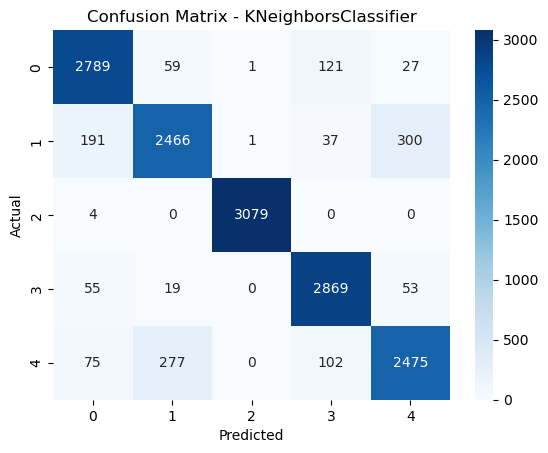

KNeighborsClassifier - Mean Accuracy (K-Fold 5): 0.9116 ± 0.0006

🔹 Weighted kNN (k=3):
Model: KNeighborsClassifier
Accuracy: 0.9108
Precision: 0.9102
Recall: 0.9108
F1: 0.9102


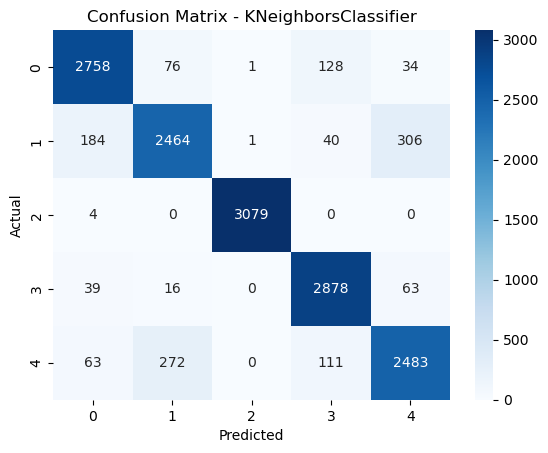

KNeighborsClassifier - Mean Accuracy (K-Fold 5): 0.9100 ± 0.0006

🔹 Normal kNN (k=5):
Model: KNeighborsClassifier
Accuracy: 0.9157
Precision: 0.9152
Recall: 0.9157
F1: 0.9150


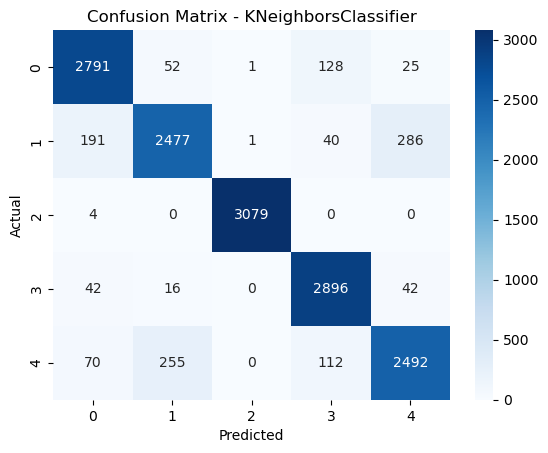

KNeighborsClassifier - Mean Accuracy (K-Fold 5): 0.9162 ± 0.0007

🔹 Weighted kNN (k=5):
Model: KNeighborsClassifier
Accuracy: 0.9156
Precision: 0.9151
Recall: 0.9156
F1: 0.9150


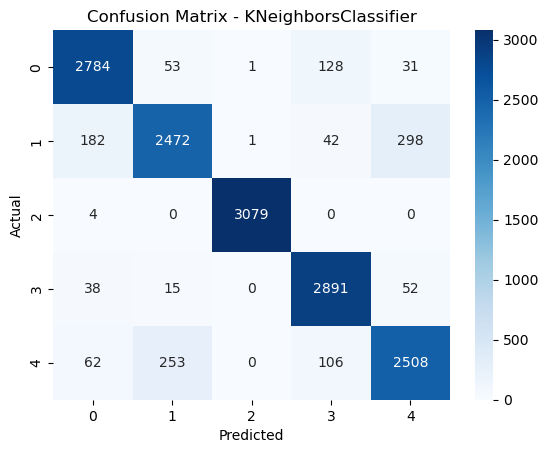

KNeighborsClassifier - Mean Accuracy (K-Fold 5): 0.9156 ± 0.0010

🔹 Normal kNN (k=7):
Model: KNeighborsClassifier
Accuracy: 0.9186
Precision: 0.9181
Recall: 0.9186
F1: 0.9179


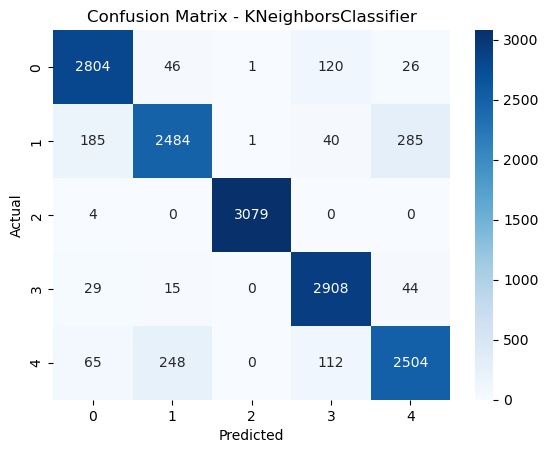

KNeighborsClassifier - Mean Accuracy (K-Fold 5): 0.9181 ± 0.0011

🔹 Weighted kNN (k=7):
Model: KNeighborsClassifier
Accuracy: 0.9179
Precision: 0.9174
Recall: 0.9179
F1: 0.9172


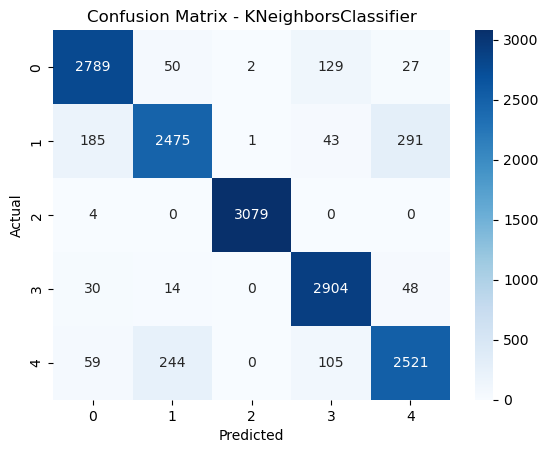

KNeighborsClassifier - Mean Accuracy (K-Fold 5): 0.9175 ± 0.0012

🔹 Normal kNN (k=9):
Model: KNeighborsClassifier
Accuracy: 0.9183
Precision: 0.9179
Recall: 0.9183
F1: 0.9177


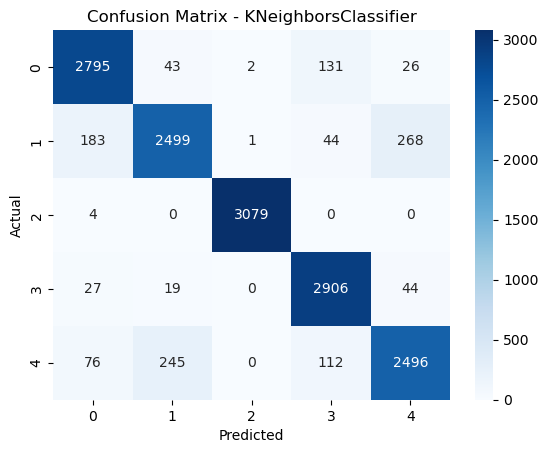

KNeighborsClassifier - Mean Accuracy (K-Fold 5): 0.9183 ± 0.0013

🔹 Weighted kNN (k=9):
Model: KNeighborsClassifier
Accuracy: 0.9198
Precision: 0.9195
Recall: 0.9198
F1: 0.9192


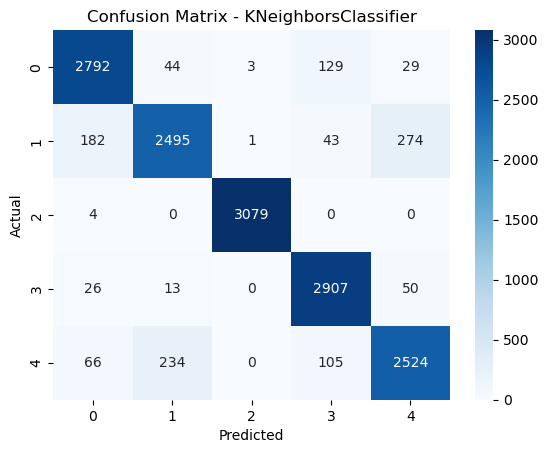

KNeighborsClassifier - Mean Accuracy (K-Fold 5): 0.9184 ± 0.0007


In [221]:
# Different k values for kNN
for k in [3, 5, 7, 9]:
    knn_uniform = KNeighborsClassifier(n_neighbors=k, weights='uniform')  # Normal kNN
    knn_weighted = KNeighborsClassifier(n_neighbors=k, weights='distance')  # Weighted kNN
    
    print(f"\n🔹 Normal kNN (k={k}):")
    train_and_evaluate(knn_uniform, X_train2, X_test2, y_train2, y_test2)
    k_fold_validation(knn_uniform, X2, y2)

    print(f"\n🔹 Weighted kNN (k={k}):")
    train_and_evaluate(knn_weighted, X_train2, X_test2, y_train2, y_test2)
    k_fold_validation(knn_weighted, X2, y2)


The kNN models with varying k values and the weighted approach show consistent improvement in performance as k increases. The normal kNN models show an increase in accuracy and other metrics as k rises, with the best performance achieved at k=9 (accuracy: 0.9183). The weighted kNN models generally perform slightly worse than the normal kNN models, with the best results at k=9 (accuracy: 0.9198). However, the performance gap between normal and weighted kNN is minor, and the accuracy slightly increases as k increases, with k=9 being the optimal choice for both normal and weighted configurations. Therefore, weighted kNN (k=9) offers the best overall performance.


🔹 Naive Bayes:
Model: GaussianNB
Accuracy: 0.6943
Precision: 0.7037
Recall: 0.6943
F1: 0.6906


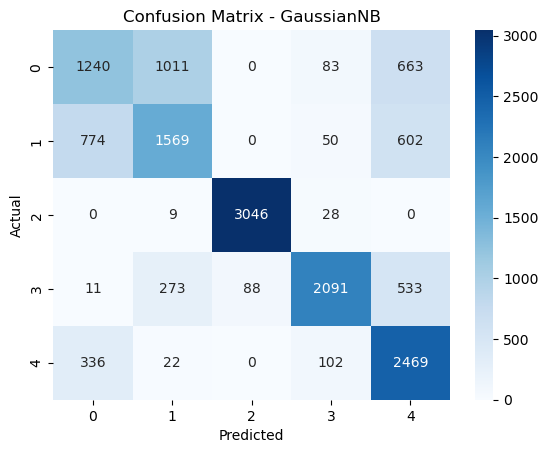

GaussianNB - Mean Accuracy (K-Fold 5): 0.6915 ± 0.0030


In [223]:
# Naive Bayes Model
naive_bayes = GaussianNB()
print("\n🔹 Naive Bayes:")
train_and_evaluate(naive_bayes, X_train2, X_test2, y_train2, y_test2)
k_fold_validation(naive_bayes, X2, y2)

The Naive Bayes model (GaussianNB) shows lower performance compared to the other models, with an accuracy of 0.6943 and precision, recall, and F1 scores ranging from 0.6906 to 0.7037. While the model provides decent results, especially in terms of precision, its accuracy and F1 score are noticeably lower than the other classifiers. This suggests that Naive Bayes might not be capturing the complexity of the data as effectively as the other models, making it less suitable for this particular task.

Random Forest (n_estimators=50):
Model: RandomForestClassifier
Accuracy: 0.9207
Precision: 0.9202
Recall: 0.9207
F1: 0.9202


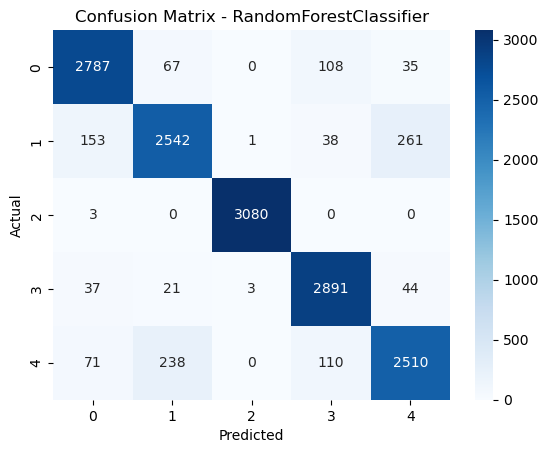

RandomForestClassifier - Mean Accuracy (K-Fold 5): 0.9201 ± 0.0018
Random Forest (n_estimators=100):
Model: RandomForestClassifier
Accuracy: 0.9211
Precision: 0.9206
Recall: 0.9211
F1: 0.9206


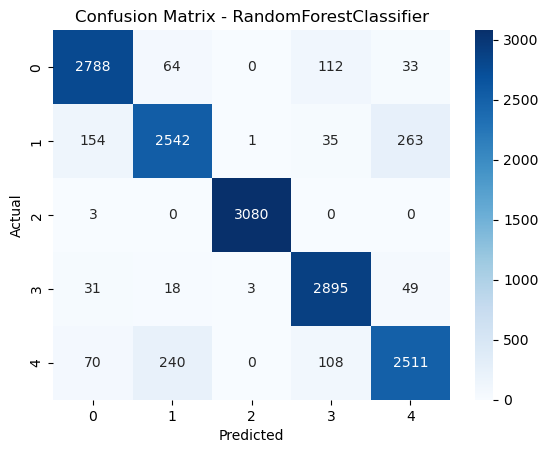

RandomForestClassifier - Mean Accuracy (K-Fold 5): 0.9207 ± 0.0020
Random Forest (n_estimators=200):
Model: RandomForestClassifier
Accuracy: 0.9209
Precision: 0.9204
Recall: 0.9209
F1: 0.9204


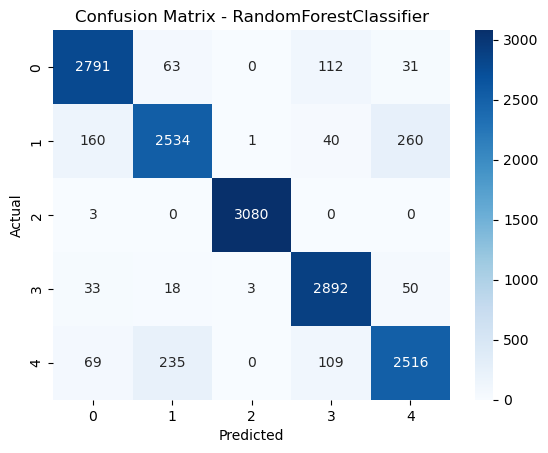

RandomForestClassifier - Mean Accuracy (K-Fold 5): 0.9212 ± 0.0020


In [225]:
# Different tree numbers for Random Forest
for n in [50, 100, 200]:
    rf = RandomForestClassifier(n_estimators=n, random_state=42)
    print(f"Random Forest (n_estimators={n}):")
    train_and_evaluate(rf, X_train2, X_test2, y_train2, y_test2)
    k_fold_validation(rf, X2, y2)

The Random Forest models with different numbers of estimators show very similar performance, with slight improvements as the number of estimators increases. The model with n_estimators=100 achieves the highest accuracy (0.9211), while the n_estimators=50 model has an accuracy of 0.9207 and the n_estimators=200 model comes close with 0.9209. The precision, recall, and F1 scores are all very close, and the K-Fold mean accuracies are also consistent. Overall, n_estimators=100 offers the best performance, but the differences between the models are minimal, making all three configurations highly effective.

SVM (kernel=linear):
Model: SVC
Accuracy: 0.9101
Precision: 0.9101
Recall: 0.9101
F1: 0.9092


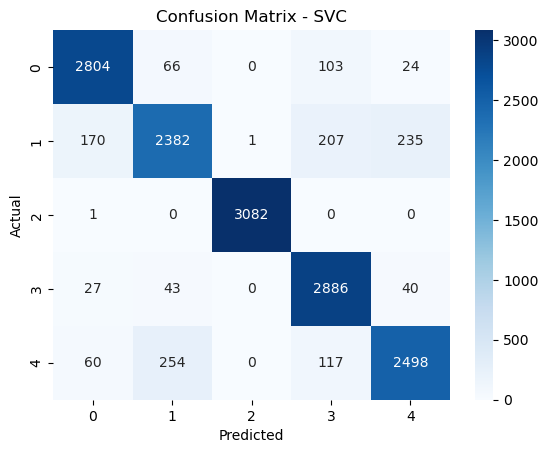

SVC - Mean Accuracy (K-Fold 5): 0.9085 ± 0.0008
SVM (kernel=rbf):
Model: SVC
Accuracy: 0.9107
Precision: 0.9104
Recall: 0.9107
F1: 0.9101


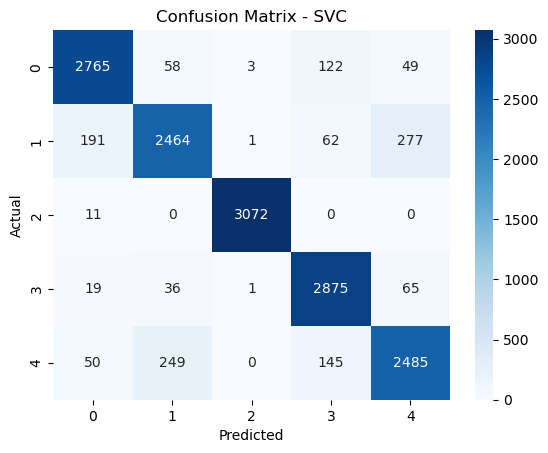

SVC - Mean Accuracy (K-Fold 5): 0.9093 ± 0.0019
SVM (kernel=poly):
Model: SVC
Accuracy: 0.9150
Precision: 0.9150
Recall: 0.9150
F1: 0.9142


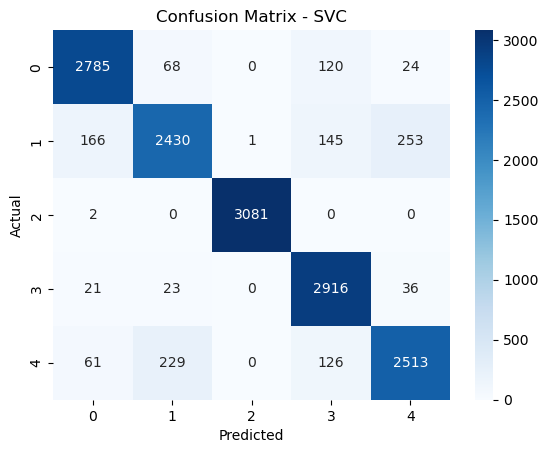

SVC - Mean Accuracy (K-Fold 5): 0.9120 ± 0.0015


In [227]:
# Different kernel types for SVM
for kernel in ["linear", "rbf", "poly"]:
    svm = SVC(kernel=kernel)
    print(f"SVM (kernel={kernel}):")
    train_and_evaluate(svm, X_train2, X_test2, y_train2, y_test2)
    k_fold_validation(svm, X2, y2)

The SVM models with different kernels show modest improvements as the kernel type changes. The linear kernel achieves an accuracy of 0.9101, while the rbf kernel performs slightly better with an accuracy of 0.9107. The polynomial kernel outperforms both, reaching an accuracy of 0.9150 and a higher F1 score (0.9142). The K-Fold mean accuracies are consistent, with the polynomial kernel showing the best performance overall. Therefore, the polynomial kernel provides the most effective results in this case, offering better accuracy and a higher F1 score.

EVALUATIONS:

The evaluation metrics and confusion matrices provide valuable insights into the performance of the models. All models, except Naive Bayes, achieved
strong results across all metrics. The lower performance of Naive Bayes can be attributed to its assumption that all features are conditionally 
independent. In image classification tasks, however, features (such as pixels) are often correlated, and the spatial relationships between pixels
are crucial for accurate classification. Since Naive Bayes treats each pixel independently, it fails to capture these relationships, leading to its
poor performance.

Examining the confusion matrices of all models except Naive Bayes reveals that the primary misclassifications occur between the Arborio-Karacadag
and Basmati-Jasmine classes. These rice types share similar structural features, with Arborio-Karacadag being more compact and round, while
Basmati-Jasmine are longer and thinner. To improve classification accuracy, it may be necessary to extract additional features, possibly related to 
edge and corner values, to better distinguish these rice types.
